In [7]:
from rdkit import Chem
from EFGs import standize

In [2]:
import pandas as pd

In [4]:
all_data = pd.read_csv("../data/USPTO_1k_TPL/uspto_1k_TPL_test.tsv", sep='\t')

In [28]:
rxn, pdt, rcts = all_data.iloc[0]["retro_template"], all_data.iloc[0]["products"], all_data.iloc[0]["reactants"],

In [5]:
all_data.head()

,Unnamed: 0,level_0,index,original_rxn,fragments,source,year,mapped_rxn,confidence,canonical_rxn_with_fragment_info,...,ID,reaction_hash,reactants,products,retro_template,template_hash,selectivity,outcomes,reagents,labels
0,360880,631204,NaN,[OH:1][C@H:2]([C:23]1[C:32]2[C:27](=[CH:28][CH...,"|f:1.2,4.5,7.8.9|",US20080280879A1_0290,2008,CC(C)O.Cl.ClCCl.O.[Br-].[Br-].[CH3:1][O:2][c:3...,0.383923,CC(C)O~O.COc1ccc2nccc([C@@H](O)CC[C@@H]3CCN(C4...,...,US20080280879A1_0290apps,75313295f4acc761f6f6b146936d46229a2c0c1699beec...,CC(C)O.Cl.ClCCl.O.[Br-].[Br-].[CH3:1][O:2][c:3...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]2[n:7][cH:8...,([C:1]-[c;H0;D3;+0:2]1:[n;H0;D2;+0:3]:[n;H0;D2...,5d3b7e558171a190903c74fc80e5960216a3b3503d6a6b...,1.0,1.0,CC(C)O.Cl.ClCCl.O.[Br-].[Br-].[Na+].[Zn+2],366
1,3449,18057,23420.0,CO.[CH2:3](C1C(S(=O)(=O)N)=CC(C(O)=O)=CC=1SCCC...,NaN,US04018794_,1977,CCCCSc1cc(C(=O)O)cc(S(N)(=O)=O)c1Cc1ccccc1.CO....,0.281201,CCCCSc1cc(C(=O)O)cc(S(N)(=O)=O)c1Cc1ccccc1.CCO...,...,US04018794_grants,54077354e7ec20cb9a24dabf251b430c16ce11a4ec8ebc...,CCCCSc1cc(C(=O)O)cc(S(N)(=O)=O)c1Cc1ccccc1.CO....,[CH3:1][CH2:2][O:3][C:4](=[O:5])[c:6]1[cH:7][c...,([C;D1;H3:2]-[CH2;D2;+0:1]-[O;H0;D2;+0:5]-[C:4...,bc7193984167c71913195a0abce257da8748eb7d4b7676...,1.0,1.0,CCCCSc1cc(C(=O)O)cc(S(N)(=O)=O)c1Cc1ccccc1.CO,47
2,40760,181710,292099.0,C([O:3][C:4](=[O:42])[CH2:5][N:6]([CH2:36][C:3...,|f:1.2|,US05298652_,1994,CC[O:32][C:30]([CH2:29][N:28]([C:26]([C:24]([c...,0.391307,CCCCCCCCCCCCCCCCCCOc1ccc(C(=O)C(=O)N(CC(=O)OCC...,...,US05298652_grants,863fecde7f2629ed45b37b61893e22cac62127c8df8ccc...,CC[O:32][C:30]([CH2:29][N:28]([C:26]([C:24]([c...,[CH3:1][CH2:2][CH2:3][CH2:4][CH2:5][CH2:6][CH2...,([C:3]-[C:2](=[O;D1;H0:4])-[OH;D1;+0:1].[C:7]-...,192a85c05b021f20177796ea8d850f269f9334cc467273...,0.0,1.0,CO.[Na+].[OH-],255
3,256297,848664,1411564.0,C(OC([N:8]1[CH2:13][CH2:12][N:11]([C:14](=[O:1...,NaN,US08623858B2_0356,2014,CC(C)(C)OC(=O)[N:6]1[CH2:5][CH2:4][N:3]([C:2](...,0.212479,CC(C)(C)OC(=O)N1CCN(C(=O)C(F)(F)F)CC1.ClCCl.O=...,...,US08623858B2_0356grants,5652da7921e52068dd9e96443325710dbd1e2d559ba8be...,CC(C)(C)OC(=O)[N:6]1[CH2:5][CH2:4][N:3]([C:2](...,[O:1]=[C:2]([N:3]1[CH2:4][CH2:5][NH:6][CH2:7][...,([C:2]-[NH;D2;+0:1]-[C:3])>>(C-C(-C)(-C)-O-C(=...,55396c1492cc3823f0701ef923544f9f4c1af584b69f4c...,1.0,1.0,ClCCl.O=C(O)C(F)(F)F,575
4,19531,94482,153662.0,[H-].[Al+3].[Li+].[H-].[H-].[H-].C(OCC)C.[CH3:...,|f:0.1.2.3.4.5|,US04631147_,1986,CCOCC.O.O=S(=O)(O)O.[Al+3].[CH3:1][C:2]1([CH3:...,0.592780,CC1(C)CCCCC(C)(C)C1=O.CCOCC.O.O=S(=O)(O)O.[Al+...,...,US04631147_grants,95ee6249829029fe0d30675fad32e26dbc6098e8e37c75...,CCOCC.O.O=S(=O)(O)O.[Al+3].[CH3:1][C:2]1([CH3:...,[CH3:1][C:2]1([CH3:3])[CH2:4][CH2:5][CH2:6][CH...,([C:1]-[CH;D3;+0:2](-[C:3])-[OH;D1;+0:4])>>([C...,0fb396942a5bc824558e6936c3618c2e342b489a89ecce...,1.0,1.0,CCOCC.O.O=S(=O)(O)O.[Al+3].[H-].[H-].[H-].[H-]...,91


In [14]:
from rdkit.Chem.Draw import IPythonConsole

In [9]:
from rdkit.Chem import AllChem

In [16]:
rxn = AllChem.ReactionFromSmarts("([C:1]-[c;H0;D3;+0:2]1:[n;H0;D2;+0:3]:[n;H0;D2;+0:5]:[nH;D2;+0:4]:[n;H0;D2;+0:6]:1)>>([C:1]-[C;H0;D2;+0:2]#[N;H0;D1;+0:3]).([N-;H0;D1:4]=[N+;H0;D2:5]=[N-;H0;D1:6])")

In [17]:
reacts = Chem.MolFromSmiles('[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]2[n:7][cH:8][cH:9][c:10]([C@@H:11]([OH:12])[CH2:13][CH2:14][C@@H:15]3[CH2:16][CH2:17][N:18]([CH:19]4[CH2:20][CH:21]([c:22]5[cH:23][cH:24][cH:25][cH:26][cH:27]5)[CH2:28]4)[CH2:29][C@@H:30]3[c:31]3[n:32][n:33][nH:34][n:35]3)[c:36]2[cH:37]1')

In [29]:
can_rcts = standize(rcts)

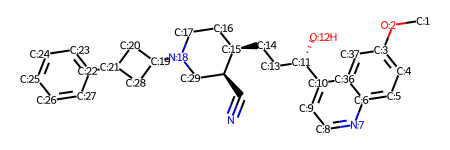

In [25]:
can_rgt = all_data.iloc[0]["reagents"]

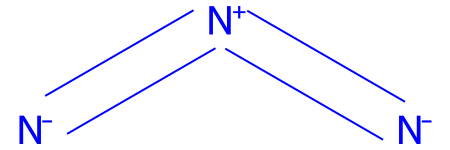

In [26]:
products[0][1]

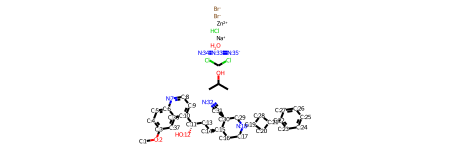

In [27]:
Chem.MolFromSmiles("CC(C)O.Cl.ClCCl.O.[Br-].[Br-].[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]2[n:7][cH:8][cH:9][c:10]([C@@H:11]([OH:12])[CH2:13][CH2:14][C@@H:15]3[CH2:16][CH2:17][N:18]([CH:19]4[CH2:20][CH:21]([c:22]5[cH:23][cH:24][cH:25][cH:26][cH:27]5)[CH2:28]4)[CH2:29][C@@H:30]3[C:31]#[N:32])[c:36]2[cH:37]1.[N+:33](=[N-:34])=[N-:35].[Na+].[Zn+2]")